# Universe method

by Reece Colclough and Oleg Glotov

In [3]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sbn

#used to check for stationarity in the time series
from statsmodels.tsa.stattools import adfuller, kpss
from scipy.stats import linregress

In [4]:
def check_stationarity(series, alpha, diff):

    # h_0 is that the series has a unit root-> if so, likely non-stationarity
    result_adf = adfuller(series)
    p_val = result_adf[1]
    if p_val < alpha:
        # reject, likely stationary
        print("ADF test: p-val=", p_val, "-> Conclusion: likely stationary")
    else:
        print("ADF test: p-val=", p_val, "-> Conclusion: likely has a trend")

    return result_adf[1]

    # print("----------------------------------------------------------------")

    # result_kpss = kpss(diff)
    # p_val = result_kpss[1]
    # if p_val > alpha:
    #     # reject, likely stationary
    #     print("KPSS test: p-val=", p_val, "-> Conclusion: likely stationary")
    # else:
    #     print("KPSS test: p-val=", p_val, "-> Conclusion: likely has a trend")


In [5]:
def methodology(stk1, stk2):
    diff = abs(stk1["Adj Close"] - stk2["Adj Close"])

    time = np.arange(len(diff))
    reg = linregress(time, diff)
    line = reg.intercept + reg.slope*time
    new_series = diff - line

    return check_stationarity(new_series, 0.05, diff)

In [6]:
def download_data(stk):

    # start date because of moderna listing in 2018 December and yfinance data delay

    start_date = "2019-01-01"
    end_date = "2023-01-01"

    stk_data = yf.download(stk,start=start_date,end=end_date)

    return stk_data

In [7]:
# Will plot 2 things

# universe = ["MSFT", "MRNA",]

# stk_data = []
# for stk in universe:
#     stk_data.append(download_data(stk))

# plt.figure()
# for x in stk_data:
#     plt.plot(x["Adj Close"], label="stk1")

# plt.legend()
# plt.title("stks Price Plot")
# plt.show()

In [8]:
# Obtain Data
universe = ["AAPL","AAL","AMD","AMZN","BA","BABA","BAC","C","CAT","COST","CSCO","CVX","DIS","DLR","EQIX","F","GM","GOOGL","GS","IBM","INTC","JNJ","JPM","KO","LMT","LULU","META","MPC","MRK","MRNA","MSFT","MU","NFLX","NKE","NVDA","PFE","TSLA","VZ","WFC","WM","XOM","SCHW","RIOT",]

stk_data = []
for stk in universe:
    stk_data.append(download_data(stk))

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


KeyboardInterrupt: 

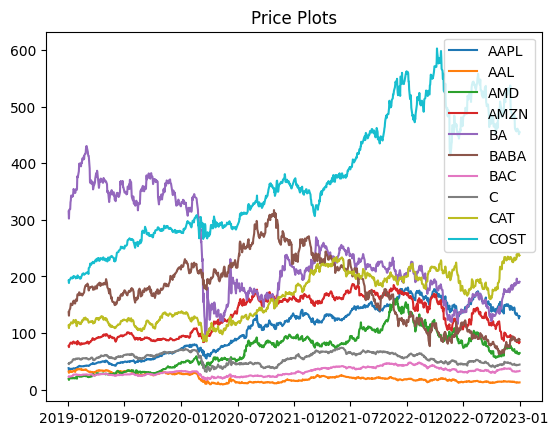

In [ ]:
plt.figure()
i = 0
for x in stk_data[:10]:
    plt.plot(x["Adj Close"], label=universe[i])
    i+=1

plt.legend()
plt.title("Price Plots")
plt.savefig('Stock Prices.png', dpi = 1500)
plt.show()

In [ ]:
# initialize cov-matrix
data = np.random.rand(len(universe), len(universe))
stockNum = len(universe)

# Calculate the stationary properties
cov = np.zeros((stockNum, stockNum))
for i in range(stockNum):
    for j in range(stockNum):
        if (i == j):
            data[i,j] = 1
        else:
            print(universe[i]+universe[j])
            
            data[i,j] = methodology(stk_data[i],stk_data[j])

AAPLAAL
ADF test: p-val= 0.670895621967531 -> Conclusion: likely has a trend
AAPLAMD
ADF test: p-val= 0.005280890279166826 -> Conclusion: likely stationary
AAPLAMZN
ADF test: p-val= 0.0511974973782184 -> Conclusion: likely has a trend
AAPLBA
ADF test: p-val= 0.44460480145101855 -> Conclusion: likely has a trend
AAPLBABA
ADF test: p-val= 0.08001364370987324 -> Conclusion: likely has a trend
AAPLBAC
ADF test: p-val= 0.4413559477816205 -> Conclusion: likely has a trend
AAPLC
ADF test: p-val= 0.2970842583221355 -> Conclusion: likely has a trend
AAPLCAT
ADF test: p-val= 0.2984896856376782 -> Conclusion: likely has a trend
AAPLCOST
ADF test: p-val= 0.02820556304923152 -> Conclusion: likely stationary
AAPLCSCO
ADF test: p-val= 0.6540365493249959 -> Conclusion: likely has a trend
AAPLCVX
ADF test: p-val= 0.11828508382810482 -> Conclusion: likely has a trend
AAPLDIS
ADF test: p-val= 0.27710495835216786 -> Conclusion: likely has a trend
AAPLDLR
ADF test: p-val= 0.19950621841324473 -> Conclusion:

In [ ]:
# Create a heatmap using Matplotlib
plt.figure(figsize=(stockNum, stockNum))
heat_map = sbn.heatmap(data, xticklabels=universe, yticklabels=universe, annot=True, cmap="mako")
plt.title("Heat Map of Stationary Pairs")
plt.figure(dpi=1200)
plt.savefig('HeatMap.png', dpi = 1200)
plt.show()

NameError: name 'plt' is not defined

In [ ]:
data

array([[1.00000000e+00, 6.70895622e-01, 5.28089028e-03, ...,
        8.86057584e-01, 6.18617296e-01, 1.32511306e-01],
       [6.70895622e-01, 1.00000000e+00, 7.06105040e-01, ...,
        8.07763569e-01, 7.65576899e-02, 8.98438676e-04],
       [5.28089028e-03, 7.06105040e-01, 1.00000000e+00, ...,
        2.12948091e-01, 9.72573331e-02, 2.69180560e-01],
       ...,
       [8.86057584e-01, 8.07763569e-01, 2.12948091e-01, ...,
        1.00000000e+00, 5.44367108e-02, 8.85552602e-01],
       [6.18617296e-01, 7.65576899e-02, 9.72573331e-02, ...,
        5.44367108e-02, 1.00000000e+00, 1.01023679e-01],
       [1.32511306e-01, 8.98438676e-04, 2.69180560e-01, ...,
        8.85552602e-01, 1.01023679e-01, 1.00000000e+00]])

In [ ]:
df = pd.DataFrame(data = data)
df.columns = universe

print("Data Frame")
print(df)
print()

# Get data below diagonal and sort
sol = (df.where(np.triu(np.ones(df.shape), k=1).astype(bool)).stack().sort_values(ascending=False).reset_index())

mapping = {i: universe[i] for i in range(len(universe))}

# Replace numbers in column 'A' with the corresponding index string
sol['level_0'] = sol['level_0'].map(mapping)

Data Frame
        AAPL       AAL       AMD      AMZN        BA      BABA       BAC   
0   1.000000  0.670896  0.005281  0.051197  0.444605  0.080014  0.441356  \
1   0.670896  1.000000  0.706105  0.869426  0.161283  0.475252  0.041484   
2   0.005281  0.706105  1.000000  0.170024  0.518994  0.305389  0.590857   
3   0.051197  0.869426  0.170024  1.000000  0.682023  0.038208  0.820065   
4   0.444605  0.161283  0.518994  0.682023  1.000000  0.256826  0.203561   
5   0.080014  0.475252  0.305389  0.038208  0.256826  1.000000  0.444913   
6   0.441356  0.041484  0.590857  0.820065  0.203561  0.444913  1.000000   
7   0.297084  0.172045  0.183282  0.815991  0.233284  0.471313  0.020572   
8   0.298490  0.161922  0.493125  0.388636  0.485609  0.361452  0.192193   
9   0.028206  0.021181  0.009280  0.194266  0.189567  0.235348  0.012102   
10  0.654037  0.022629  0.415907  0.881295  0.132947  0.414938  0.011514   
11  0.118285  0.487257  0.797224  0.337665  0.092223  0.370098  0.712267   
1

In [ ]:
print(sol)
print()
n = 30
print(f"last {n} rows")
print()
print(sol.tail(n))

    level_0 level_1         0
0     GOOGL      KO  0.956034
1       BAC     XOM  0.955561
2        GM     XOM  0.942874
3      CSCO   GOOGL  0.939276
4       MRK      VZ  0.938539
..      ...     ...       ...
898    CSCO     PFE  0.000745
899       F     JNJ  0.000379
900    MRNA    TSLA  0.000221
901     AAL     IBM  0.000028
902    AMZN     DLR  0.000004

[903 rows x 3 columns]

last 30 rows

    level_0 level_1         0
873    CSCO      GM  0.005255
874     BAC     JNJ  0.004863
875    COST   GOOGL  0.004469
876      GM    RIOT  0.004417
877       C    RIOT  0.004044
878    CSCO     JNJ  0.004036
879     IBM     WFC  0.003808
880     AAL     JNJ  0.003754
881     IBM     MRK  0.003420
882     WFC      WM  0.003327
883    AMZN     DIS  0.003306
884     AMD     DLR  0.003267
885       C    INTC  0.003102
886     JNJ      VZ  0.003063
887     PFE     WFC  0.002776
888      MU    RIOT  0.002508
889    META    MRNA  0.001912
890    MRNA    MSFT  0.001598
891    EQIX    META  0.001554
8